<a href="https://colab.research.google.com/github/liman8/Notebooks/blob/main/FJSS_resenje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import math
from matplotlib.ticker import MultipleLocator


# Flexible Job Shop Scheduling

Анастасија Голић, Стефан Топалов

Flexible Job Shop Scheduling је оптимизациони проблем распоређивања послова на машинама. Циљ је минимизација укупног времена обраде уз поштовање ограничења попут редоследа операција, доступности машина и слично

# Опис проблема



Дат је скуп послова $ J = \{ J_1, J_2, \dots, J_n \} $, где је сваки посао независан. Посао $ J_i $ се састоји од секвенце операција $ O_{i1}, O_{i2}, \dots, O_{in_i} $, које се морају извршити једна за другом у датом редоследу. Дат је и скуп машина $ M = \{ M_1, M_2, \dots, M_m \} $. Свака операција $ O_{ij} $ може се извршити на било којој машини из подскупа $ \mu_{ij} \subseteq M $.

- Ако постоји најмање једна операција $ O_{ij} $ за коју је $ \mu_{ij} $ прави подскуп скупа $ M $, кажемо да је систем **делимично флексибилан**.
- Ако је $ \mu_{ij} = M $ за сваку операцију $O_{ij} $, онда имамо случај **потпуне флексибилности**.

Време обраде сваке операције зависи од машине на којој се извршава. Време обраде операције $ O_{ij} $ на машини $ M_k $ означава се са $p_{ijk} $.

Tакође, постоје ограничења:
1. **Преклапање операција није дозвољено**: свака операција мора бити завршена без прекида након што започне.
2. **Једна операција по машини**: машине не могу извршавати више од једне операције у истом тренутку.
3. Сви послови и машине су доступни у тренутку $ t = 0 $.


# ПРИМЕР 1

<table>
  <tr>
    <td>
      <table border="1">
        <tr>
          <th>Послови</th>
          <th>Секвенца</th>
          <th>операција</th>
          <th></th>
        </tr>
        <tr>
          <td>J<sub>1</td>
          <td>(1,2)</td>
          <td>3</td>
          <td>1</td>
        </tr>
        <tr>
          <td>J<sub>2</td>
          <td>(2,3)</td>
          <td>(1,3)</td>
          <td>2</td>
        </tr>
        <tr>
          <td>J<sub>3</td>
          <td>1</td>
          <td>2</td>
          <td>(1,3)</td>
        </tr>
      </table>
    </td>
    <td>
      <table border="">
        <tr>
          <th>Послови</th>
          <th>Време      </th>
          <th>обраде</th>
          <th>      </th>
        </tr>
        <tr>
          <td>J<sub>1</td>
          <td>(7,3)</td>
          <td>4</td>
          <td>1</td>
        </tr>
        <tr>
          <td>J<sub>2</td>
          <td>(2,6)</td>
          <td>(2,8)</td>
          <td>4</td>
        </tr>
        <tr>
          <td>J<sub>3</td>
          <td>2</td>
          <td>5</td>
          <td>(1,5)</td>
        </tr>
      </table>
    </td>
  </tr>
</table>






Табеле илуструју пример проблема са три посла која се извршавају на три машине. Прва табела садржи информације о томе на којим машинама се могу обављати одређене операције задатих послова. У другој табели налазе се подаци о временима извршавања тих операција на одговарајућим машинама. Може се закључити да је у оквиру посла $J_1$ прву операцију могуће обрадити на машини $M_1$, или на машини $M_2$ уколико се  операција извршава на машини $M_1$ време обраде је  7 јединица времена, док је време обраде на машини $M_2$ 3 јединиве времена. У складу усвојеним ограничењима операција $O_{11}$ ће почети за извршавањем тек када  машина $M_1$ или машина $М_2$(у зависности од тога на коју машину је операција распоређена задатим распоредом) буде ослобођена. Следећа операција посла $J_1$ je операција $O_{12}$ и обрађује на машини $M_3$ уколико је завршено извршавање операције $O_{11}$, односно претходне операције посла, и уколико је машина $M_3$ завршила обраду свих претхоно распоређених операција.Уколико су услови за почетак извршавање операције $O_{12}$ она ће се обрађивати на машини 3, а време обраде ће бити 4 јединице времена

# ПРИМЕР 2

| Посао  | Операција | M1  | M2  | M3  |
|------|-----------|------|------|------|
| J₁   | O₁,₁      |  2   |  -   |  -   |
|      | O₁,₂      |  -   |  3   |  -   |
|      | O₁,₃      |  -   |  5   |  2   |
| J₂   | O₂,₁      |  9   |  -   |  7   |
|      | O₂,₂      |  -   |  1   |  -   |
|      | O₂,₃      |  -   |  -   |  3   |
| J₃   | O₃,₁      |  5   |  -   |  -   |
|      | O₃,₂      |  -   |  1   |  -   |
|      | O₃,₃      |  3   |  8   |  -   |
| J₄   | O₄,₁      |  1   |  -   |  5   |
|      | O₄,₂      |  -   |  6   |  -   |
|      | O₄,₃      |  2   |  -   |  -   |


### Пример кодирања и декодирања јединке

 Кодиране јединке састоје се из два дела. Први део представља перметуације $n$ послова са $m$ понављања сваког посла и односи се на распоред операција (слично као код основог проблема). Други део јединке сасоји се од машина на којима се одређена операција извршава почевши од прве операције првог посла. Пример јединке која би представљала потенцијално решење проблема из примера 2

<table style="border-collapse: collapse; text-align: center;">
  <tr>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>3</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>3</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>11</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>12</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>13</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>21</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>22</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>23</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>31</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>32</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>33</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>41</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>42</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>43</td>
  </tr>
</table>

<table style="border-collapse: collapse; text-align: center;">
  <tr>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">1</td>
  </tr>
</table>


Како се проблем састоји од 4 посла koја су секвенца 3 операције и 3 машине, дужина првог дела хромозома (јединке) је 12. Проласком кроз први део са леве на десно, $k$-то појављивање броја посла се односи на $k$-ту операцију у секвенци тог посла. Други део јединке се такође састоји од 12 гена, где се свака позиција гена односи на одређену операцију на начин који је илустрован, а садржај гена односи се машину на којој се операција обавља.  Декодирањем првог гена из првог дела, који је 2, закључује се да се ради о првој операцији посла $J_2$ ($𝑂_{21}$),. Да бисмо одредили на којој машини се извршава ова операција потребно је посматрати ген који другог сегмента који се односи на операцију $O_{21}$. Четрти ген који је 3, означава да се ова операција извршава на машини $𝑀_3$ , а из табеле (пример 2) видимо да трајање те операције на машини $𝑀_3$   износи 7 секунди. Затим, други ген из првог дела јединке, који је 4, означава прву операцију посла $𝐽_4$ ($𝑂_{41}$), а десети ген из другог дела, који је 3, показује да се операција извршава на машини $𝑀_3$, где трајање износи 5 секунди. Трећи ген из првог дела, такође 4, односи се на другу операцију посла $𝐽_4$ ($𝑂_{42}$), која се, према једанаестом гену из другог дела, извршава на машини $𝑀_2$ са трајањем од 6 секунди. На крају, Овако се за сваки ген проверава редослед операција, додељивање машина и време обраде. Декодирањем јединке до последњег гена закључујемо да је распоред валидан, односно да су свим операцијама додељене машине из скупа оних на којима је њихово извршавање могуће.

<table style="border-collapse: collapse; text-align: center;">
  <tr>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>3</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>3</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">J<sub>3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>11</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>12</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>13</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>21</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>22</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>23</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>31</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>32</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>33</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>41</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>42</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">O<sub>43</td>
  </tr>
</table>

<table style="border-collapse: collapse; text-align: center;">
  <tr>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">4</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: pink; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">1</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">3</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">2</td>
    <td style="width: 30px; height: 30px; background-color: red; border: 1px solid black;">1</td>
  </tr>
</table>

Декодирањем јединке, јасно је да је операција $O_{12}$ додељна машини $M_1$ на којој њено извршавање није могуће. Према томе овај распоред није валидан.

Приликом кодирања јединки могуће је унапред увести ограничење да се у другом делу хромозома на месту гена који се односи на операцију $O_{ij}$ моше наћи само машина из скупа $\mu_{ij}$. Други приступ је кажњанање невалидних распореда увођењем великог времена извршавања на машинама на којима обрада није могућа

| Посао  | Операција | M1  | M2  | M3  |
|------|-----------|------|------|------|
| J₁   | O₁,₁      |  2   |  9999   |  9999   |
|      | O₁,₂      |  9999   |  3   |  9999   |
|      | O₁,₃      |  9999   |  5   |  2   |
| J₂   | O₂,₁      |  9   |  9999   |  7   |
|      | O₂,₂      |  9999   |  1   |  9999   |
|      | O₂,₃      |  9999   |  9999   |  3   |
| J₃   | O₃,₁      |  5   |  9999   |  9999   |
|      | O₃,₂      |  9999   |  1   |  9999   |
|      | O₃,₃      |  3   |  8   |  9999   |
| J₄   | O₄,₁      |  1   |  9999   |  5   |
|      | O₄,₂      |  9999   |  6   |  9999   |
|      | O₄,₃      |  2   |  9999   |  9999   |

In [ ]:
def generate_initial_population(num_job, num_oper, num_mach, population_size):
    """
    Generiše početnu populaciju hromozoma sa dva dela:
    - Prvi deo: Nasumičan redosled poslova i operacija.
    - Drugi deo: Nasumičan izbor mašina za svaku operaciju.

    num_job: Broj poslova.
    num_oper: Broj operacija po poslu.
    num_mach: Broj mašina.
    population_size: Broj hromozoma u populaciji.
    """
    population = []

    for _ in range(population_size):
        # Prvi deo: Nasumičan redosled (job, operation)
        sequence_part = []
        for job in range(num_job):
            for oper in range(num_oper):
                sequence_part.append((job, oper))
        random.shuffle(sequence_part)

        # Drugi deo: Nasumične mašine za svaku operaciju
        machine_part = []
        for _ in sequence_part:
            selected_machine = random.randint(0, num_mach - 1)  # Nasumična mašina
            machine_part.append(selected_machine)

        population.append((sequence_part, machine_part))

    return population


In [ ]:
generate_initial_population(4,3,3, 20)
# radi lakse implementacije indeksi poslova pocinju od 0, tako da pojavljivanje gena 0 u prvvom delu sekvence oznacava operacije prvog posla, a u drugom delu izvrsavanje na prvoj masini

[([(3, 1),
   (1, 2),
   (2, 2),
   (3, 2),
   (1, 1),
   (0, 1),
   (2, 1),
   (0, 0),
   (2, 0),
   (0, 2),
   (3, 0),
   (1, 0)],
  [1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2]),
 ([(3, 1),
   (1, 2),
   (0, 0),
   (1, 1),
   (2, 2),
   (3, 0),
   (0, 1),
   (0, 2),
   (3, 2),
   (2, 1),
   (2, 0),
   (1, 0)],
  [2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0]),
 ([(3, 2),
   (2, 2),
   (1, 2),
   (3, 0),
   (3, 1),
   (2, 0),
   (2, 1),
   (1, 0),
   (0, 0),
   (0, 2),
   (1, 1),
   (0, 1)],
  [1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]),
 ([(2, 2),
   (1, 0),
   (2, 0),
   (3, 2),
   (3, 1),
   (1, 2),
   (0, 2),
   (3, 0),
   (0, 1),
   (1, 1),
   (0, 0),
   (2, 1)],
  [0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2]),
 ([(0, 0),
   (1, 0),
   (2, 0),
   (3, 2),
   (0, 2),
   (0, 1),
   (2, 2),
   (3, 1),
   (1, 1),
   (1, 2),
   (2, 1),
   (3, 0)],
  [0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1]),
 ([(1, 2),
   (1, 1),
   (3, 0),
   (2, 2),
   (3, 2),
   (2, 1),
   (3, 1),
   (0, 0),
   (1, 0),
   (0, 2),
   (2, 0),
   (0, 1)

# OVDE TREBA GRANTOGRAM DODATI

In [ ]:
import matplotlib.pyplot as plt

def plot_gantt_chart(schedule, num_jobs, num_machines):
    """
    Generiše Gantogram za raspored.

    schedule: Lista operacija sa početnim i završnim vremenima
              [(job, operation, machine, start_time, end_time), ...]
    num_jobs: Ukupan broj poslova
    num_machines: Ukupan broj mašina
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    colors = plt.cm.get_cmap("tab20", num_jobs)  # Različite boje za različite poslove

    for job, operation, machine, start_time, end_time in schedule:
        ax.broken_barh([(start_time, end_time - start_time)],
                       (machine - 0.4, 0.8),  # Visina trake u okviru mašine
                       facecolors=colors(job),
                       label=f'Job {job + 1}' if operation == 0 else "")

    # Postavka osi
    ax.set_xlabel("Time")
    ax.set_ylabel("Machines")
    ax.set_yticks(range(1, num_machines + 1))
    ax.set_yticklabels([f'Machine {i}' for i in range(1, num_machines + 1)])
    ax.grid(True)

    # Legenda
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

    plt.title("Gantt Chart for Flexible Job Shop Scheduling")
    plt.show()


### Оцена вредности критеријума оптималности

У свакој итерацији генетског алгоритма потребно је одредити вредност критеријума оптималности за сваку од јединки како би се даље вршилло рангирање јединки и слекција.

In [ ]:
def makespan(chromosomes, population_size, num_jobs, num_oper, input_data, num_machines):
    """
    Izračunava makespan i fitness vrednosti za hromozome sa dva dela:
    - Prvi deo: Redosled (job, operation).
    - Drugi deo: Odabrane mašine za svaku operaciju.
    """
    chrom_fit = []  # Lista makespan vrednosti
    chrom_fitness = []  # Lista reciprocnih vrednosti za fitness

    for chromosome in chromosomes:
        sequence_part, machine_part = chromosome  # Prvi i drugi deo hromozoma
        machine_times = [0] * num_machines  # Vremena zauzeća mašina
        job_times = [0] * num_jobs          # Vremena završetka poslova

        for idx, (job, operation) in enumerate(sequence_part):
            selected_machine = machine_part[idx]  # Mašina iz drugog dela hromozoma
            operation_times = input_data[job][operation]

            # Proveri validnost izabrane mašine
            '''  if operation_times[selected_machine] == 9999:
                raise ValueError(f"Invalid machine selected for job {job}, operation {operation}")'''

            # Dobij vreme obrade na izabranoj mašini
            processing_time = operation_times[selected_machine]

            # Izračunaj vreme početka i završetka operacije
            start_time = max(job_times[job], machine_times[selected_machine])
            end_time = start_time + processing_time

            # Ažuriraj vremena
            job_times[job] = end_time
            machine_times[selected_machine] = end_time

        makespan = max(machine_times)  # Maksimalno vreme za trenutni hromozom
        chrom_fit.append(makespan)
        chrom_fitness.append(1 / makespan)  # Fitness vrednost je reciprocna

    return chrom_fit, chrom_fitness


### Селекција

In [ ]:
 # implemntacija rangiranja jedinki i ruletske selekcije
def cost_func(chromosomes, population_size, num_job, num_oper, input, num_machine):
    chrom_fit, chrom_fitness=makespan(chromosomes, population_size, num_job, num_oper, input, num_machine)
    return chrom_fitness, chrom_fit

def rank(cost, chromosomes, population_size, num_job, num_oper, input, num_machine, population_list):
    costs, chrom_fit = cost_func(chromosomes, population_size, num_job, num_oper, input, num_machine)
    ranked = sorted(list(zip(chromosomes, costs, chrom_fit, population_list)), key=lambda c: c[2])
    ranked_chrom, ranked_costs, ranked_chrom_fit, ranked_population_list = list(zip(*ranked))
    ranked_chrom = list(ranked_chrom)
    ranked_chrom_fit = list(ranked_chrom_fit)
    return ranked_chrom, ranked_costs, ranked_chrom_fit

def natural_selection(ranked_parents, n):
    return ranked_parents[:n]

def roulette_selection(parents):

  pairs = []
  i = 0
  for i in range(0, len(parents), 2):
    weights=[];
    for i in range(len(parents)):
        weights.append((len(parents)-i)*random.random())
    if (weights[0]>=weights[1]):
        maxInd1=0;
        maxInd2=1;
    else:
        maxInd1=1;
        maxInd2=0;

    for i in range(2,len(parents)):
        if weights[i]>weights[maxInd1]:
            maxInd2=maxInd1
            maxInd1=i
        elif weights[i]>weights[maxInd2]:
            maxInd2=1
    pairs.append([parents[maxInd1], parents[maxInd2]])

  return pairs

### Укрштање

Оператор се састоји из два одвојена укрштања.

Приликом кодирања другог дела јединке не постоје ограничења у виду броја понављања одређених гена, према томе може се имплементирати као, на пример, једнотачкасто или двотачкасто укрштање.

Прво се врши укрштање првог дела јединке (као код основног проблема) водећи рачуна о валидности јединки. Први део потомачке јединке, исто као и родитељске, морају представљати пермутације послова који се понављају онолико пуа колико операција садржи посао.
* Покушај једнотачкастог укрштања

  Једнотачкасто укрштање подраумева насумично одабрану тачка у хромозомима родитеља, а делови хромозома изнад те тачке затим се размењују између родитеља.


  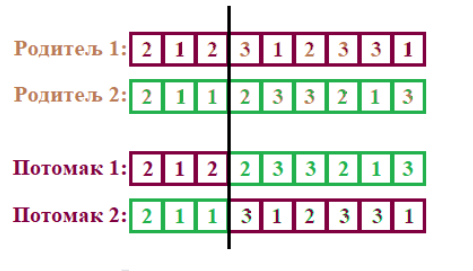
  
  * На овај начин добијени потомциниси адекватна решења проблема, на пример, потомак 1 садржи два гена која се односе на први посао, уместо три.

  Оператор укрштања је могуће имплментирати на много начина.



### Укршање поделом на дисјунктивне скупове

Уколико се проблем састоји од $n$ послова, први корак је креирања скупа $s = \{1, 2, \dots, n\}$, а затим насумична подела на два дисјунктивна подскупа $ s_1$ и $s_2$. Потомак се генерише тако што се распоред послова из подскупа $ s_1 $ директно пресликава из првог родитеља, а остатак празних поља попуњава се пословима из подскупа $s_2$ редоследом којим се појављују у другом родитељу. На аналоган начин се генерише и други потомак. Пример са слике илуструје укрштања родитеља где је скуп $ s = \{1, 2, 3\} $ подељен на подскупове $ s_1 = \{1\} $ и $ s_2 = \{2, 3\}$. Сви послови означени са 1 директно се пресликавају у потомачку једницу, а остала празна места попуњавају се генима који означавају послове 2 и 3 редом којим се појављују у другој родитељској јединци.

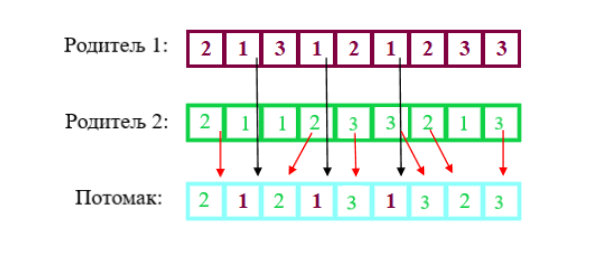

На овај начин могуће добити први део потомачких јединки


In [ ]:
def crossover(pairs, num_job, num_oper):
    """
    Implements crossover for chromosomes with two parts:
    - First part: Sequence of (job, operation).
    - Second part: Machine assignments for operations.

    pairs: List of parent pairs.
    num_job: Number of jobs.
    num_oper: Number of operations per job.

    Returns:
    - List of offspring chromosomes.
    """
    offspring = []
    for parent1, parent2 in pairs:
        # Unpack parents
        sequence1, machines1 = parent1
        sequence2, machines2 = parent2

        # Perform crossover for the first part (sequence of jobs and operations)
        crossover_point_seq = random.randint(1, len(sequence1) - 1)
        child1_sequence = sequence1[:crossover_point_seq] + [gene for gene in sequence2 if gene not in sequence1[:crossover_point_seq]]
        child2_sequence = sequence2[:crossover_point_seq] + [gene for gene in sequence1 if gene not in sequence2[:crossover_point_seq]]

        # Perform crossover for the second part (machine assignments)
        crossover_point_mach = random.randint(1, len(machines1) - 1)
        child1_machines = machines1[:crossover_point_mach] + machines2[crossover_point_mach:]
        child2_machines = machines2[:crossover_point_mach] + machines1[crossover_point_mach:]

        # Combine sequences and machines into offspring
        offspring.append((child1_sequence, child1_machines))
        offspring.append((child2_sequence, child2_machines))

    return offspring


### Мутација

Оператор мутације се, као и оператор укрштања, мора прилагодити проблему тако да након мутирања јединки добијени хромозоми буду валидна решења проблема. Такође, и мутација се имплементира из дав дела.  

 * Мутација ротирањем послова

   Унутар јединке одабирају се два насумична гена који замењују позиције. На тај начин резултујућа јединака проширује простор претраге насумичним изменама, али не нарушава начин репрезентовања јединки.
     
   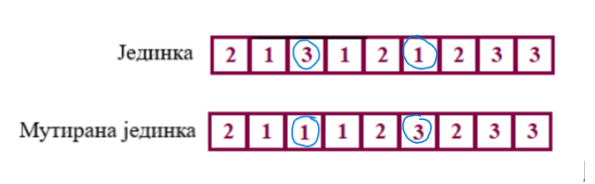

In [ ]:
def mutation(population_list, mutation_rate, num_job, num_oper):
    """
    Primenjuje mutaciju rotacijom poslova na hromozomima sa dva dela:
    - Prvi deo: Rotacija sekvence poslova i operacija.
    - Drugi deo: Ostaje nepromenjen.
    """
    mutated_population = []
    for chromosome in population_list:
        sequence_part, machine_part = chromosome  # Razdvoji hromozom na dva dela

        if random.random() < mutation_rate:  # Primeni mutaciju na osnovu verovatnoće
            # Izaberi nasumični posao za rotaciju
            job_indices = [i for i, (job, op) in enumerate(sequence_part)]
            random_job = random.choice(range(num_job))
            job_operations = [idx for idx in job_indices if sequence_part[idx][0] == random_job]

            if len(job_operations) > 1:  # Rotacija ima smisla samo ako postoji više operacija
                rotation_point = random.randint(1, len(job_operations) - 1)
                rotated_part = job_operations[:rotation_point]
                remaining_part = job_operations[rotation_point:]
                rotated_job = rotated_part + remaining_part

                # Kreiraj novi prvi deo
                new_sequence_part = list(sequence_part)
                for i, idx in enumerate(rotated_job):
                    new_sequence_part[job_operations[i]] = sequence_part[idx]

                mutated_population.append((new_sequence_part, machine_part))
            else:
                # Ako nema dovoljno operacija za rotaciju, dodaj bez promene
                mutated_population.append(chromosome)
        else:
            # Ako nema mutacije, dodaj hromozom bez promene
            mutated_population.append(chromosome)

    return mutated_population


### Elitizam


In [ ]:
def elitis(ranked_parenst, ranked_children, elitis_rate, population_size):
    old_ind_size=int(np.round(population_size*elitis_rate))
    return ranked_parenst[:old_ind_size]+ranked_children[:(population_size-old_ind_size)]

optimal sequence ([(3, 1), (0, 1), (1, 0), (2, 0), (3, 2), (1, 1), (0, 0), (3, 0), (2, 1), (2, 2), (1, 2), (0, 2)], [1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1])
optimal value:16.000000




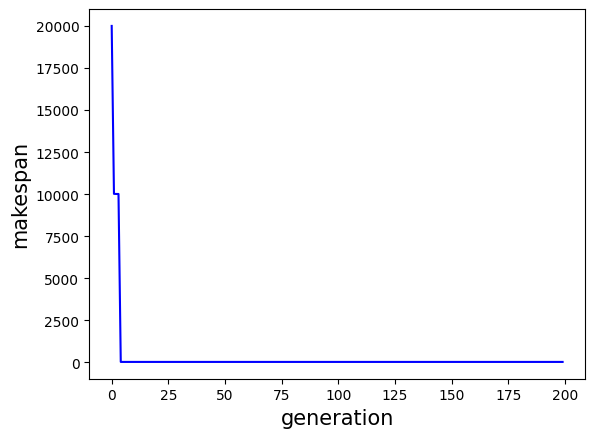

In [ ]:


def job_schedule(cost_func, population_size = 55, elitis_rate=0.2, mutation_rate=0.1, inverse_mutation_rate=0.2, num_iteration =200 ):
    makespan_record=[]
    input=[[[2,9999,9999],[9999,3,9999],[9999,5,2]],[[9,9999,7],[9999,1,9999],[9999,9999,3]],[[5,9999,9999],[9999,1,9999],[3,8,9999]],[[1,9999,5],[9999,6,9999],[2,9999,9999]]]

    num_job=len(input)
    num_oper=len(input[0])
    num_machine=len(input[0][0])


    avg_list=[]
    Tbest=math.inf
    same=0

    population_list=generate_initial_population(num_job, num_oper, num_machine, population_size)
    chromosomes=population_list

    for iteration in range(num_iteration):
        Tbest_now = math.inf

        parents, costs, chrom_fit=rank(cost_func,chromosomes, population_size, num_job, num_oper,input, num_machine, population_list)

        pairs=roulette_selection(parents)

        offspring_list= crossover(pairs, num_job, num_oper)

        offspring_list=mutation(offspring_list,mutation_rate, num_job, num_oper)

        #offspring_list=inverse_mutation(offspring_list,inverse_mutation_rate)

        ranked_children,costs_children,chrom_fit_children=rank(cost_func,offspring_list,population_size,num_job,num_oper,input,num_machine,population_list)

        chromosomes=elitis(parents,ranked_children,elitis_rate,population_size)


        for pop_size in range(population_size):
            if chrom_fit[pop_size] < Tbest_now:
                Tbest_now = chrom_fit[pop_size]
                sequence_now = copy.deepcopy(chromosomes[pop_size])
        if Tbest_now < Tbest:
            Tbest = Tbest_now
            sequence_best = copy.deepcopy(sequence_now)

        makespan_record.append(Tbest)

    print("optimal sequence", sequence_best)
    print("optimal value:%f"%Tbest)
    print("\n")

    plt.plot([i for i in range(len(makespan_record))],makespan_record,'b')
    plt.ylabel('makespan', fontsize=15)
    plt.xlabel('generation', fontsize=15)
    plt.show()

    return Tbest

schedule = job_schedule(cost_func)